Laura Michel Bolivar Ricon 

#Importamos Librerias 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris                #dataset sobre la flor iris
from sklearn.model_selection import train_test_split    #Clase para dividir dataset(train y test )
from sklearn.tree import DecisionTreeClassifier         #Clase que permite implementar un arbol de desicion 
import matplotlib.pyplot as plt                         #Libreria de generar graficos 

#Cargando Dataset

In [2]:
db_iris=load_iris()

#Explorando los archivos 

In [5]:
#print(db_iris.DESCR) #Informacion de la dataset
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#Convertimos el dataset a dataframe

In [6]:
df_iris=pd.DataFrame(db_iris.data,columns=db_iris.feature_names)
df_iris['target'] = db_iris.target   #Agregamos una nueva columna 
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Dividiendo el conjunto de datos (train y set)

In [9]:
#Se estan dividiendo los datos 75% y 25%
X_train , X_test, Y_train, Y_test= train_test_split(df_iris[db_iris.feature_names], df_iris['target'], random_state=0)

#Instanciar arbol de desicion 

In [10]:
# Si no se define este valor el arbol puede crecer hasta que el algoritmo encunetre minima ramificacion 
arbol_clasi=DecisionTreeClassifier(max_depth=3, random_state=0)

#Entrenamos el modelo 

In [11]:
arbol_clasi.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Usamos los datos de test para predecir 

In [14]:
#Prediccion de registro 
#Tomamos la informacion del primer registro (X_test)
print(X_test.iloc[0])
#Nos muestra el resultado de la flor 
print(Y_test.iloc[0])
#Le pasamos los datos al algoritmo 
arbol_clasi.predict(X_test.iloc[0].values.reshape(1,-1))

#predicciones para varios registros 
arbol_clasi.predict(X_test[0:10])



sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64
2


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

#Presicion(accuary) del arlogritmo

In [15]:
accuary=arbol_clasi.score(X_test,Y_test)
print(accuary)

0.9736842105263158


In [27]:
db_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#Graficando el arbol 

In [16]:
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data =export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

#Conociendo las caracteristicas mas importantes 

In [19]:
importances= pd.DataFrame({'feature':X_train.columns, 'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.578
2,petal length (cm),0.422
0,sepal length (cm),0.000
1,sepal width (cm),0.000


#Mejorando el Arbol 

In [22]:
#La profundidad de un arbol la medimos con max_depth
#Cramos una lista con profunidad de 1 al 6
max_depth_lista=list(range(1,6))
accuracy=[]
for depth in max_depth_lista:
    #creamos la instancia del arbol
  arbol_clasi= DecisionTreeClassifier(max_depth=depth, random_state=0)
  #Entrenamos on la informacion 
  arbol_clasi.fit(X_train,Y_train)
  #Obtenemos el score
  score=arbol_clasi.score(X_test,Y_test)
  accuracy.append(score)

Visualizamos la informacion para determinar cual es la profundiad mas adecuada (maxima inferencia)


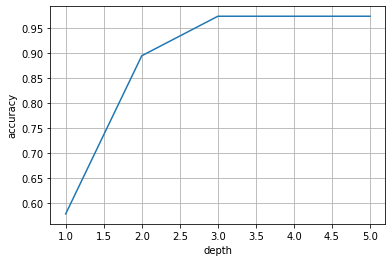

In [24]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

Hiper-paraemtros que aydan a mejorar la creaccion de un arbol

->**max_depth:** la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
->**min_samples_split:** número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
->**min_samples_leaf:** número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
->**max_leaf_nodes:** número máximo de nodos finales

